# Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Variables Declaration

In [3]:
# references to the past data file
file_path = '/content/drive/My Drive/DatasetTAfix.csv'

# Read and Load Past Data

In [4]:
# read and load past data
data = pd.read_csv(file_path, index_col='Hari_ke')
data.tail()

,Tanggal,Positif,Sembuh,Meninggal,PSBB,Virus Corona
Hari_ke,,,,,,
317,12/1/2021,10047,7068,302,40,79
318,1/13/2021,11278,7657,306,27,78
319,1/14/2021,11557,7741,295,24,63
320,1/15/2021,12818,7491,238,25,80
321,1/16/2021,14224,8662,283,22,80


# Create Training Data and Testing Data

In [5]:
# create training data
train_data = data.loc[0:250]
train_data.tail()

,Tanggal,Positif,Sembuh,Meninggal,PSBB,Virus Corona
Hari_ke,,,,,,
246,2/11/2020,2618,3624,101,19,43
247,3/11/2020,2973,3931,102,16,68
248,4/11/2020,3356,3785,113,14,60
249,5/11/2020,4065,3860,89,13,56
250,6/11/2020,3778,3563,94,15,65


In [6]:
# create validating data
valid_data = data.loc[251:len(data):]
valid_data.tail()

,Tanggal,Positif,Sembuh,Meninggal,PSBB,Virus Corona
Hari_ke,,,,,,
317,12/1/2021,10047,7068,302,40,79
318,1/13/2021,11278,7657,306,27,78
319,1/14/2021,11557,7741,295,24,63
320,1/15/2021,12818,7491,238,25,80
321,1/16/2021,14224,8662,283,22,80


# Separate Data to X and Y Variable

In [7]:
x_train = train_data[['Meninggal','Sembuh','Virus Corona','PSBB']]
x_train.tail()

,Meninggal,Sembuh,Virus Corona,PSBB
Hari_ke,,,,
246,101,3624,43,19
247,102,3931,68,16
248,113,3785,60,14
249,89,3860,56,13
250,94,3563,65,15


In [8]:
# separate training data to Y variable
y_train = train_data[['Positif']]
y_train.tail()

,Positif
Hari_ke,
246,2618
247,2973
248,3356
249,4065
250,3778


In [9]:
# separate validating data to X variable
x_valid = valid_data[['Meninggal','Sembuh','Virus Corona','PSBB']]
x_valid.tail()

,Meninggal,Sembuh,Virus Corona,PSBB
Hari_ke,,,,
317,302,7068,79,40
318,306,7657,78,27
319,295,7741,63,24
320,238,7491,80,25
321,283,8662,80,22


In [10]:
# separate validating data to Y variable
y_valid = valid_data[['Positif']]
y_valid.tail()

,Positif
Hari_ke,
317,10047
318,11278
319,11557
320,12818
321,14224


# Prediction using Multiple Linear Regression

In [11]:
# add a constant column to training data
x2_train = sm.add_constant(x_train)
x2_train

,const,Meninggal,Sembuh,Virus Corona,PSBB
Hari_ke,,,,,
1,1.0,0,0,72,0
2,1.0,0,0,49,0
3,1.0,0,0,26,0
4,1.0,0,0,18,0
5,1.0,0,0,17,0
...,...,...,...,...,...
246,1.0,101,3624,43,19
247,1.0,102,3931,68,16
248,1.0,113,3785,60,14


In [12]:
# Review model of Linear Regression
model = sm.OLS(y_train, x2_train)
model_fit = model.fit()

# Print out the statistics
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                Positif   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     668.2
Date:                Tue, 26 Jan 2021   Prob (F-statistic):          1.80e-130
Time:                        03:27:41   Log-Likelihood:                -1866.3
No. Observations:                 250   AIC:                             3743.
Df Residuals:                     245   BIC:                             3760.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -132.3823    102.690     -1.289   

In [13]:
# Print constant and coefficient X variables
print(model_fit.params)

const          -132.382292
Meninggal        11.686353
Sembuh            0.650368
Virus Corona      3.686406
PSBB             -0.342793
dtype: float64


In [14]:
# Training Linear Regression model
mlr = LinearRegression()
mlr = mlr.fit(x_train, y_train)

# Validating data using model
y_pred = mlr.predict(x_valid)

df = pd.DataFrame({'Actual' : y_valid.values.flatten(),'Predicted' : y_pred.flatten()}) 
df = df.sort_index()
df

,Actual,Predicted
0,4262,3587.706608
1,3880,3451.442132
2,2853,3520.221889
3,3779,3165.385858
4,3770,3087.095412
...,...,...
66,10047,8271.208278
67,11278,8701.790071
68,11557,8573.603355
69,12818,7807.215482


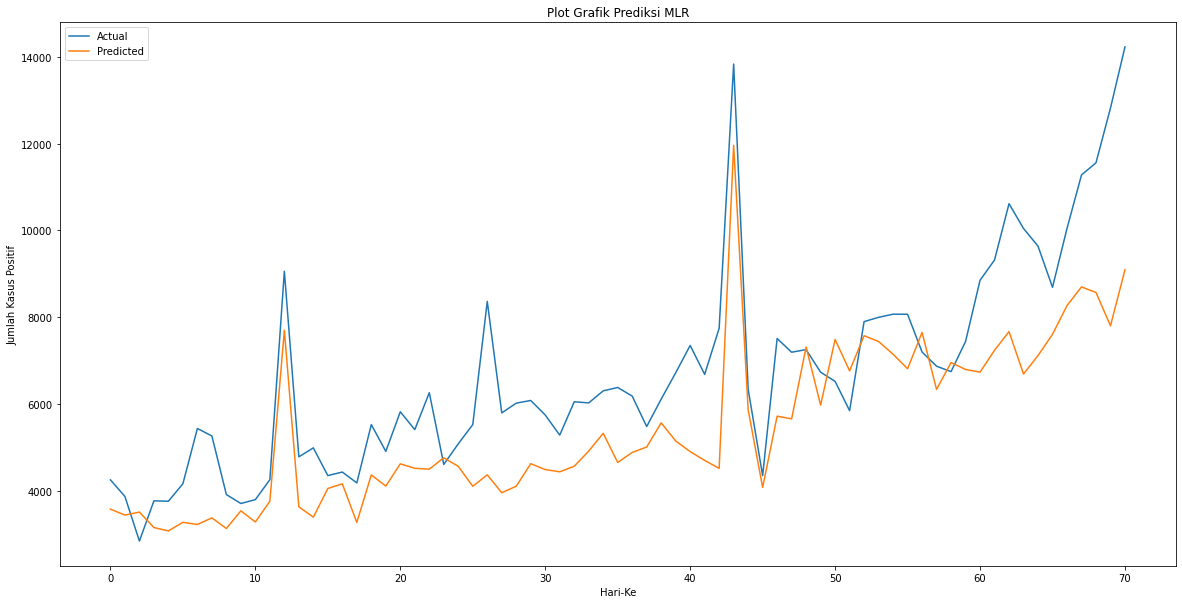

In [15]:
import matplotlib.pyplot as plt
df.plot(kind='line', 
             stacked=False,
             figsize=(20, 10),
             )
plt.title('Plot Grafik Prediksi MLR')
plt.ylabel('Jumlah Kasus Positif')
plt.xlabel('Hari-Ke')

plt.savefig('MLR-Positif Covid.png')
plt.show()

# Evaluating Linear Regression model

In [16]:
MAE = sklearn.metrics.mean_absolute_error(y_valid,y_pred)
MSE = sklearn.metrics.mean_squared_error(y_valid,y_pred) #harus di waktu yang sama
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((np.array(y_valid) - np.array(y_pred)) / np.array(y_valid))) * 100
print('MAE = {0:.4f} '.format(MAE))
print('MSE = {0:.4f} '.format(MSE))
print('RMSE = {0:.4f} '.format(RMSE))
print('MAPE = {0:.4f} '.format(MAPE))

MAE = 1361.6931 
MSE = 2957857.1542 
RMSE = 1719.8422 
MAPE = 19.2765 
